In [23]:
import pandas as pd
import numpy as np
import random as rd
from sklearn.decomposition import PCA
from sklearn import preprocessing #scale
import matplotlib.pyplot as plt 

# Data Generation Code

Ingin membangkitkan data 100 variabel dengan 2 karakteristik yang berbeda sebagai index: "wt" dan "ko".

wt: Wild Type DNA

ko: Knock Out DNA


In [2]:
genes = ['gene' + str(i) for i in range(1,101)]
genes[:3]

['gene1', 'gene2', 'gene3']

wt= wild type samples 


ko= knock out samples

wt dan ko dibangkitkan dari populasi yang berbeda

In [4]:
wt = ['wt' + str(i) for i in range(1,6)]
ko = ['ko' + str(i) for i in range(1,6)]
wt[:3]

['wt1', 'wt2', 'wt3']

In [5]:
data = pd.DataFrame(columns=[*wt, *ko], index=genes)
data.head()

,wt1,wt2,wt3,wt4,wt5,ko1,ko2,ko3,ko4,ko5
gene1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gene2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gene3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gene4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gene5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
for gene in data.index: 
    data.loc[gene,'wt1':'wt5'] = np.random.poisson(lam=rd.randrange(500,1000), size=5)
    data.loc[gene,'ko1':'ko5'] = np.random.poisson(lam=rd.randrange(10,500), size=5)

In [7]:
print(data.head())

       wt1  wt2  wt3  wt4  wt5  ko1  ko2  ko3  ko4  ko5
gene1  979  958  957  884  999   95   76   90   85   74
gene2  557  558  609  551  541  310  283  297  308  281
gene3  949  981  968  939  974   77   84   82   98   84
gene4  710  718  687  694  738   57   48   40   50   45
gene5  547  539  545  531  549   70   77   79   68   85


In [8]:
print(data.shape)

(100, 10)


In [9]:
data=data.T
data

,gene1,gene2,gene3,gene4,gene5,gene6,gene7,gene8,gene9,gene10,...,gene91,gene92,gene93,gene94,gene95,gene96,gene97,gene98,gene99,gene100
wt1,979,557,949,710,547,606,516,550,549,712,...,713,549,671,596,754,987,861,654,667,821
wt2,958,558,981,718,539,644,517,552,513,737,...,792,551,648,623,737,925,924,787,674,876
wt3,957,609,968,687,545,653,513,503,525,736,...,795,543,700,635,730,922,892,716,636,868
wt4,884,551,939,694,531,670,488,521,539,692,...,729,545,722,578,743,958,883,729,661,845
wt5,999,541,974,738,549,612,492,489,552,752,...,788,571,701,620,713,950,898,747,685,865
ko1,95,310,77,57,70,445,471,325,178,46,...,304,227,329,425,276,70,43,69,475,335
ko2,76,283,84,48,77,454,460,328,178,32,...,301,188,357,442,273,56,37,52,482,351
ko3,90,297,82,40,79,441,472,345,183,43,...,309,192,357,458,260,52,40,62,495,313
ko4,85,308,98,50,68,394,492,341,168,39,...,287,190,359,412,253,56,38,58,530,357
ko5,74,281,84,45,85,470,468,367,172,33,...,274,194,373,432,261,61,38,63,514,315


Data yang dimiliki adalah data dengan 100 fitur (genes) ditunjukkan oleh **KOLOM**. Dan 10 observasi data **BARIS**

# Perform PCA on the data

scale = $\frac{(measure-mean)^2}{n.measurements}$

In [10]:
# First center and scale the data
scaled_data = preprocessing.scale(data)

In [11]:
scaled_data

array([[ 1.0519826 ,  0.94432398,  0.96953065,  1.00099584,  1.02020469,
         0.66292536,  1.35450908,  1.26493045,  1.07246633,  0.95886371,
         0.92015583,  0.99096632,  0.97285774,  0.95701008,  0.93172953,
         0.77065245,  1.07237943,  0.98073023,  1.06387812,  0.99884646,
         0.99024281,  1.00029087,  1.04117891,  0.78926706,  1.02623477,
         1.05538132,  0.97484944,  1.21015639,  0.98121071,  0.89919814,
         1.28416947,  1.05996813,  0.99402083,  0.95447147,  0.81313304,
         0.85552524,  0.92514848,  1.12015603,  0.97632876,  1.12612226,
         0.89640069,  1.04478076,  1.13463075,  0.91372189,  0.98079428,
         1.07945768,  1.03110872,  1.06340827,  0.8455769 ,  0.90060442,
         1.07327336,  1.07614192,  1.11556106,  0.94353836,  0.95876955,
         0.98037628,  1.01676083,  0.94669581,  1.10781505,  0.66504327,
         1.0161815 ,  0.54258628,  0.66799938,  0.99958543,  1.00424117,
         0.6652167 ,  0.94161885,  1.162282  ,  1.0

In [17]:
pca = PCA() # create a PCA object
pca.fit(scaled_data) # do the math
pca_data = pca.transform(scaled_data) # get PCA coordinates for scaled_data

# Draw a scree plot and a PCA plot

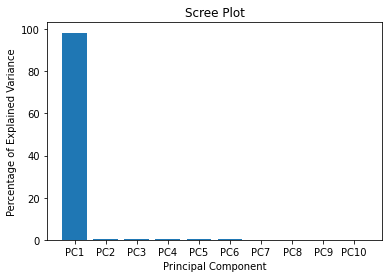

In [18]:
#The following code constructs the Scree plot
per_var = np.round(pca.explained_variance_ratio_* 100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]
 
plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()

In [20]:
np.round(pca.explained_variance_ratio_* 100, decimals=1)

array([98.3,  0.5,  0.4,  0.2,  0.2,  0.2,  0.1,  0.1,  0.1,  0. ])

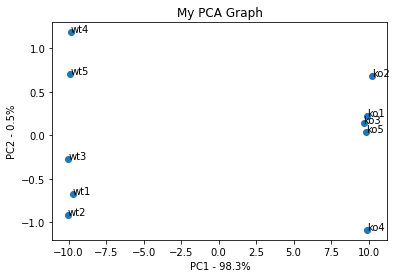

In [22]:

#the following code makes a fancy looking plot using PC1 and PC2
pca_df = pd.DataFrame(pca_data, index=[*wt, *ko], columns=labels)
 
plt.scatter(pca_df.PC1, pca_df.PC2)
plt.title('My PCA Graph')
plt.xlabel('PC1 - {0}%'.format(per_var[0]))
plt.ylabel('PC2 - {0}%'.format(per_var[1]))
 
for sample in pca_df.index:
    plt.annotate(sample, (pca_df.PC1.loc[sample], pca_df.PC2.loc[sample]))
 
plt.show()

**Insight**



*   Secara umum data terdiri atas 2 cluster yaitu ko dan wt
*   Semakin jauh jarak titik observasi semakin jauh karakteristiknya
*   Nilai informasi yang ditangkap oleh visualisi diatas PC 1 sebesar 98.3%
 





# Determine which genes had the biggest influence on PC1

In [ ]:
## get the name of the top 10 measurements (genes) that contribute
## most to pc1.
## first, get the loading scores
loading_scores = pd.Series(pca.components_[0], index=genes)
loading_scores

gene1      0.100463
gene2      0.100608
gene3      0.100002
gene4      0.100655
gene5      0.100536
             ...   
gene96     0.100472
gene97     0.100629
gene98     0.099627
gene99     0.092561
gene100    0.098719
Length: 100, dtype: float64

Loading score menunjukkan nilai korelasi fitur terhadap PC, semakin besar loading score semakin memberi kontribusi yang besar terhadap PC

In [ ]:
## now sort the loading scores based on their magnitude (besar ke kecil)
sorted_loading_scores = loading_scores.abs().sort_values(ascending=False)
sorted_loading_scores

gene81    0.100715
gene57    0.100691
gene37    0.100673
gene68    0.100672
gene78    0.100670
            ...   
gene11    0.098077
gene7     0.097659
gene75    0.093923
gene99    0.092561
gene56    0.090661
Length: 100, dtype: float64

In [ ]:
# get the names of the top 10 genes
top_10_genes = sorted_loading_scores[0:10].index.values

In [ ]:
## print the gene names and their scores (and +/- sign)
print(loading_scores[top_10_genes])

gene81    0.100715
gene57    0.100691
gene37    0.100673
gene68    0.100672
gene78    0.100670
gene85    0.100668
gene29    0.100666
gene18    0.100665
gene44    0.100658
gene4     0.100655
dtype: float64


10 variabel yang memberikan impact tertinggi pada PC10 variabel yang memberikan impact tertinggi pada PC

PCA bagian dari Unsupervised Learning

PCA dapat Melihat karakteristik data high dimensi

